In [562]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import os
import sys
import numpy as np

home_folder = os.getcwd()
print(home_folder)
while not home_folder.endswith("pyquil_program"):
    home_folder = os.path.dirname(home_folder)
sys.path.append(os.path.join(home_folder, "pauli_lindblad_per"))
import pickle

e:\OneDrive\Dokumente\Uni_kram\Masterarbeit\pyquil_program


In [563]:
def decipher_name(namebase):
    i = 0
    dic = dict()
    split_namebase = namebase.split("_")
    #parser.add_argument('--plusone', '-p', help='Takes Neighboring qubits into account', default=False, action='store_true')
    #i, dic["tomography_connections"] = i+1, (split_namebase[i] == "True")
    #parser.add_argument('--sum', '-s', help='Same as -p and turns sumation on over neighboring qubits', default=False, action='store_true')
    i, dic["sum_over_lambda"] = i+1, (split_namebase[i] == "True")
    if dic["sum_over_lambda"]:
        dic["tomography_connections"] = True
    #parser.add_argument('--pntsamples', type=int, help='How many samples in PNT? Default: 16', default=16)
    i, dic["pntsamples"] = i+1, int(split_namebase[i])
    #parser.add_argument('--pntsinglesamples', type=int, help='How many single samples in PNT? Default: 100', default=100)
    i, dic["pntsinglesamples"] = i+1, int(split_namebase[i])
    #parser.add_argument('--persamples', type=int, help='How many samples in PER? Default: 100', default=100)
    i, dic["persamples"] = i+1, int(split_namebase[i])
    #parser.add_argument('--shots', type=int, help='How many shots? Default: 1000', default=1000)
    i, dic["shots"] = i+1, int(split_namebase[i])
    #parser.add_argument('--backend', type=str, help='Which backend to use? Default: FakeVigoV2', default="FakeVigoV2")
    #import qiskit.providers.fake_provider as fake_provider
    #backend = fake_provider.FakeVigoV2()
    #if split_namebase[i] != "FakeVigoV2":
    #    method = getattr(fake_provider, split_namebase[6])
    #    backend = method()
    dic["backend"] = split_namebase[i]
    i+=1

    #parser.add_argument('--cross', '-c', help='Simulates Cross Talk Noise', default=False, action='store_true')
    i, dic["do_cross_talk_noise"] = i+1, (split_namebase[i] == "True")
    #parser.add_argument('--allqubits', '-a', help='runs over all qubits in the tomography', default=False, action='store_true')
    #i, dic["allqubits"] = i+1, (split_namebase[i] == "True")
    #parser.add_argument('--onlyTomography', help='Only does the tomography and then ends the program', default=False, action='store_true')
    i, dic["onlyTomography"] = i+1, (split_namebase[i] == "True")

    #parser.add_argument('--setqubits', type=int, nargs='+', help='Which qubits to use?: Default: 0123 and transpile')
    import ast
    i, dic["qubits"]= i+1, ast.literal_eval(split_namebase[i])
    dic["num_qubits"] = 5#len(dic["qubits"])
    #if split_namebase[7] == '[0,1,2,3]' and split_namebase[8] == 'and' and split_namebase[9] == 'transpile':
    return dic

In [564]:
# Determine Folders
main_folder_path = "server_run_collection".split('/')
main_folder = ""
for segment in main_folder_path:
    main_folder = os.path.join(main_folder, segment)
folders = [f for f in os.listdir(os.path.join(home_folder, main_folder)) if os.path.isdir(os.path.join(os.path.join(home_folder, main_folder), f))]
filtered_folders = [f for f in folders if not decipher_name(f)["do_cross_talk_noise"] 
                    and decipher_name(f)["pntsamples"]== 16]
#filtered_folders = folders
for folder in filtered_folders:
    print(folder)

False_16_100_100_1024_Line5_False_True_{0, 1, 2, 3}_[2, 4, 8, 16]


In [565]:
# Load Data
coeffs_datas = []
infidelities_datas = []
for folder in filtered_folders:
    print(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "coeffs.pickle"))
    with open(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "coeffs.pickle"), "rb") as f:
        coeffs = pickle.load(f)
    coeffs_datas.append(coeffs)
    with open(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "infidelities.pickle"), "rb") as f:
        infidelities = pickle.load(f)
        """ 
        print(infidelities)
        inf2 = []
    for inf in infidelities:
        tempdic = {}
        for temp2 in inf:
            for i in temp2:
                print(i)
                tempdic[i] = temp2[i]
        inf2.append(tempdic)
    print(coeffs)
    print(inf2)
    infidelities = inf2
    with open(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "infidelities.pickle"), "wb") as f:
        pickle.dump(infidelities, f) """
    infidelities_datas.append(infidelities)

e:\OneDrive\Dokumente\Uni_kram\Masterarbeit\pyquil_program\server_run_collection\False_16_100_100_1024_Line5_False_True_{0, 1, 2, 3}_[2, 4, 8, 16]\coeffs.pickle


In [566]:
with open(os.path.join(os.path.join(os.path.join(home_folder, main_folder),filtered_folders[0]), "noise_model.pickle"), "rb") as f:
    (noise_model, twoqubit_error_template, singlequbit_error_template) = pickle.load(f)
from TrotterExample import get_noise_model, make_initial_Circuit
#(noise_model, twoqubit_error_template, singlequbit_error_template) = get_noise_model()
dic = decipher_name(filtered_folders[0])
backend = dic["backend"]
circuit = make_initial_Circuit(list(dic["qubits"]), dic["num_qubits"], backend, 2)[0]

In [567]:
def get_index(qc, inst, i=None):
    if inst._InstructionMeta__name == 'Declare':
        return tuple([])
    if hasattr(inst, "qubits"):
        return tuple([q.index for q in inst.qubits])
    elif hasattr(inst, "qubit"):
        return tuple([inst.qubit.index])
    else:
        raise Exception(inst + " has no qubits")

In [568]:
from TrotterExample import circuit_to_layers
from primitives.circuit import PyquilCircuit

layers = circuit_to_layers(PyquilCircuit(circuit))

In [569]:
from pyquil.paulis import PauliTerm
def Pauli(string):
    return PauliTerm.from_list([(p,i) for i, p in enumerate(string)])
def to_label(pauli, pauli_length = 5):
    return pauli.pauli_string(range(pauli_length))
def get_error_for_circuit(circuit, twoqubit_error_template, singlequbit_error_template, backend):
    def mul_Pauli(pauli1, pauli2):
        return pauli1 * pauli2

    num_qubits = 5
    identity_string = 'I'*num_qubits
    error_state = {Pauli(identity_string): 1}
    for inst in circuit:
        if inst._InstructionMeta__name == 'Declare':
            continue
        temp_error_state = {}
        indexes = get_index(circuit, inst)
        if len(indexes) == 1:
            index = indexes[0]
            for (op, p) in singlequbit_error_template:
                op = Pauli("".join((identity_string[:index] + to_label(op, pauli_length=1)+ identity_string[index+1:])))
                for og_op in error_state:
                    og_p = error_state[og_op]
                    new_op = mul_Pauli(op, og_op)
                    temp_error_state[new_op] = temp_error_state.get(new_op, 0) + p*og_p
        elif len(indexes) == 2:
            #print(inst)
            for (op, p) in twoqubit_error_template:
                temp_string = (identity_string[:indexes[0]] + "".join((to_label(op, pauli_length=2)))[0]+ identity_string[indexes[0]+1:])
                op = Pauli("".join((temp_string[:indexes[1]] + "".join((to_label(op, pauli_length = 2)))[1]+ temp_string[indexes[1]+1:])))
                for og_op in error_state:
                    og_p = error_state[og_op]
                    new_op = mul_Pauli(op, og_op)
                    temp_error_state[new_op] = temp_error_state.get(new_op, 0) + p*og_p
        else:
            if inst.operation.name == 'barrier':
                continue
            raise Exception("Too many qubits")
        error_state = temp_error_state
    return [(op, error_state[op]) for op in error_state]

In [570]:
def model_terms(layer, *list):
    return layer._model_terms(list)

In [571]:
def splice_string(string, indexes):
    for index in sorted(indexes):
        index -= sorted(indexes).index(index)
        string = string[:index]+string[index+1:]
    return string

In [572]:
def pauli_basis(length):
    from itertools import product
    operators = "IXYZ"

    ret = [Pauli("".join(i)) for i in product(*[operators]*length)]
    return ret


In [573]:
choosen_qubits = [2,3]
layer_number = 0
groups = []
num_qubits = decipher_name(filtered_folders[0])["num_qubits"]
for qubit in choosen_qubits:
    groups += [pauli for pauli in pauli_basis(num_qubits) if to_label(pauli)[qubit] != 'I' and (splice_string(to_label(pauli), [qubit]) == 'I'*(num_qubits-1))]
groups += [pauli for pauli in pauli_basis(num_qubits) if to_label(pauli)[choosen_qubits[0]] != 'I' and to_label(pauli)[choosen_qubits[1]] != 'I' and (splice_string(to_label(pauli), [choosen_qubits[0], choosen_qubits[1]]) == 'I'*(num_qubits-2))]


print([to_label(pauli) for pauli in groups])

['IIXII', 'IIYII', 'IIZII', 'IIIXI', 'IIIYI', 'IIIZI', 'IIXXI', 'IIXYI', 'IIXZI', 'IIYXI', 'IIYYI', 'IIYZI', 'IIZXI', 'IIZYI', 'IIZZI']


In [574]:
from pyquil.paulis import PauliTerm
singlequbit_error_template = [(PauliTerm('I', 0), 1)]
print(twoqubit_error_template)
print(singlequbit_error_template)

[((1+0j)*Z0*Y1, 0.008802700270751796), ((1+0j)*Y0, 0.0032989083407153896), ((1+0j)*Y0*Y1, 0.01917444731546973), ((1+0j)*Y0*X1, 0.019520575974201874), ((1+0j)*I, 0.9492033680988612)]
[((1+0j)*I, 1)]


In [575]:
from qiskit.providers.aer.noise import pauli_error
true_error_template = {pauli: error for pauli, error in get_error_for_circuit(layers[layer_number].qc, twoqubit_error_template, singlequbit_error_template, backend)}
#true_error = pauli_error(get_error_for_circuit(layers[layer_number].qc, twoqubit_error_template, singlequbit_error_template, backend))

In [576]:
for key in true_error_template:
    print(to_label(key), true_error_template[key])

ZYZYI 7.748753205669375e-05
YIZYI 2.9039301344000718e-05
YYZYI 0.00016878691257540146
YXZYI 0.00017183377941333783
IIZYI 0.008355552745362363
ZYYII 2.9039301344000718e-05
YIYII 1.0882796240441565e-05
YYYII 6.32547441776109e-05
YXYII 6.4396590896863e-05
IIYII 0.0031313349080564733
ZYYYI 0.00016878691257540146
YIYYI 6.32547441776109e-05
YYYYI 0.0003676594298537244
YXYYI 0.000374296255584958
IIYYI 0.018200449973278035
ZYYXI 0.00017183377941333783
YIYXI 6.4396590896863e-05
YYYXI 0.000374296255584958
YXYXI 0.0003810528863645874
IIYXI 0.018528996461942126
ZYIII 0.008355552745362363
YIIII 0.0031313349080564733
YYIII 0.018200449973278035
YXIII 0.018528996461942126
IIIII 0.9009870340102222


In [577]:
# Make error strings
twoqubit_error_string = ""
for temp in twoqubit_error_template:
    twoqubit_error_string = twoqubit_error_string + to_label(temp[0], pauli_length=2)+":" +"%.7s"%temp[1]+"   "

singlequbit_error_string = ""
for temp in singlequbit_error_template:
    singlequbit_error_string = singlequbit_error_string +" "+ to_label(temp[0], pauli_length=2)+":" +"%.7s"%temp[1]+"   "

In [578]:
""" # Make / load transfer matrix
transfer_matrix = None
for folder in filtered_folders:
    if os.path.exists(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "transfer_matrixes.pickle")):
        with open(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "transfer_matrixes.pickle"), "rb") as f:
            transfer_matrixes = pickle.load(f)
            transfer_matrix = transfer_matrixes[layer_number]

if transfer_matrix is None:
    for folder in filtered_folders:
        if os.path.exists(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "transfer_matrix.pickle")):
            with open(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "transfer_matrix.pickle"), "rb") as f:
                (transfer_matrix, saved_layer_number) = pickle.load(f)
                if saved_layer_number != layer_number:
                    transfer_matrix = None
                    
if transfer_matrix is None:
    transfer_matrix = PTM(true_error.to_quantumchannel()).data #Find out more about this
    
for folder in filtered_folders:
    with open(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "transfer_matrix.pickle"), "wb") as f:
        pickle.dump((transfer_matrix, layer_number), f) """

' # Make / load transfer matrix\ntransfer_matrix = None\nfor folder in filtered_folders:\n    if os.path.exists(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "transfer_matrixes.pickle")):\n        with open(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "transfer_matrixes.pickle"), "rb") as f:\n            transfer_matrixes = pickle.load(f)\n            transfer_matrix = transfer_matrixes[layer_number]\n\nif transfer_matrix is None:\n    for folder in filtered_folders:\n        if os.path.exists(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "transfer_matrix.pickle")):\n            with open(os.path.join(os.path.join(os.path.join(home_folder, main_folder),folder), "transfer_matrix.pickle"), "rb") as f:\n                (transfer_matrix, saved_layer_number) = pickle.load(f)\n                if saved_layer_number != layer_number:\n                    transfer_matrix = None\n                    \nif transfer

In [579]:
coe = True
infidelities_list = []
coeffs_list = []
labels = []
#stack = {pauli: (1-transfer_matrix[i][i]).real for i,pauli in enumerate(pauli_basis(backend.num_qubits))}
#stack = [stack[pauli] for pauli in groups]
#infidelities_list.append(stack)
coeffs_list.append([true_error_template.get(pauli, 0) for pauli in groups])
labels.append("Real Error")

[to_label(key) for key in groups]

['IIXII',
 'IIYII',
 'IIZII',
 'IIIXI',
 'IIIYI',
 'IIIZI',
 'IIXXI',
 'IIXYI',
 'IIXZI',
 'IIYXI',
 'IIYYI',
 'IIYZI',
 'IIZXI',
 'IIZYI',
 'IIZZI']

{IIIXY: 0.0, IIIZZ: 0.0013689784117190938, IXIII: 0.0, ZZIII: 0.0, IIYXI: 0.0, XYIII: 0.0, IIYII: 0.0, IIIXZ: 0.0, IIIXI: 0.0, IXYII: 0.0, IXZII: 0.26894570242029886, IIIYI: 0.0, IIIYY: 0.0, IIIZX: 0.001368978411719091, IYYII: 0.0, IIIIY: 0.0, IYIII: 0.0, XIIII: 0.0, IIXXI: 0.0, IIIYZ: 0.0, IIIXX: 0.0, IIZXI: 0.0, YXIII: 0.0, IXXII: 0.001720032192166133, YYIII: 0.0, IZXII: 0.0, IIYZI: 0.0, IZZII: 0.5901208299014186, XXIII: 0.0, IZYII: 0.0, ZXIII: 0.0, IYXII: 0.0, IIIZY: 0.00136897841171911, ZIIII: 0.0, IIXII: 0.0, IZIII: 0.0, YZIII: 0.0, YIIII: 0.0, IIZZI: 0.0, ZYIII: 0.0, XZIII: 0.0, IIXZI: 0.0, IIXYI: 0.0, IYZII: 0.0, IIIZI: 0.0013689784117190962, IIYYI: 0.0, IIZYI: 0.0, IIIIZ: 0.0, IIZII: 0.0, IIIIX: 0.0, IIIYX: 0.0}
2


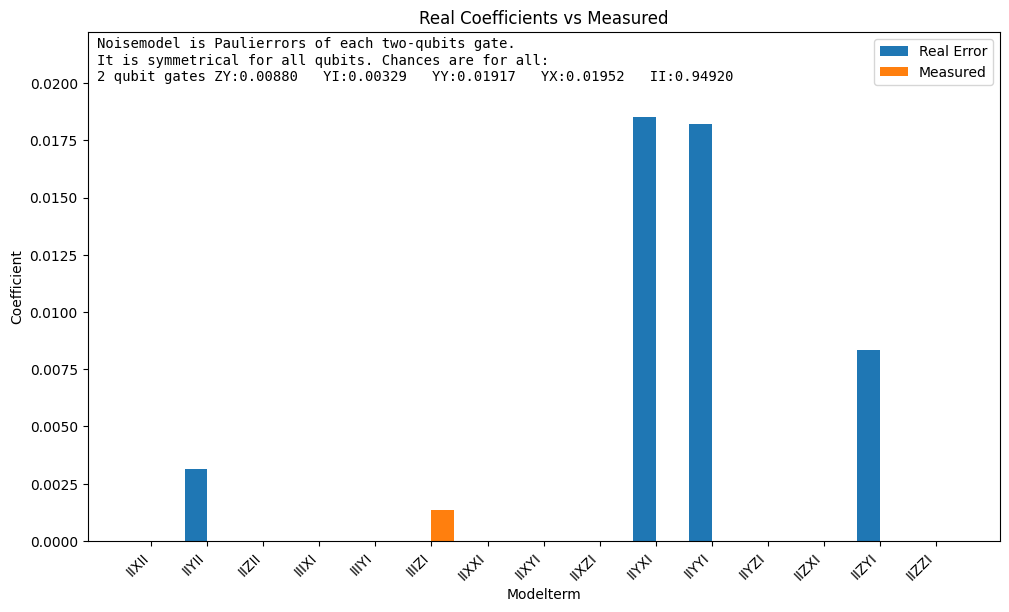

In [580]:
from pauli_lindblad_per.primitives.pauli import PyQuilPauli
failed_folders = 0
for array_of_coeffs, array_of_infidelities, folder in zip(coeffs_datas, infidelities_datas, filtered_folders):
    coeffs = array_of_coeffs[layer_number]
    infidelities = array_of_infidelities[layer_number]
    print(coeffs)
    coeffs_list.append([coeffs[PyQuilPauli(to_label(key))] for key in groups])
    try:
        pass#infidelities_list.append([infidelities[key] for key in groups])
    except Exception as e:
        failed_folders += 1
        print(e)
        print("Failed Folders:", failed_folders)
        continue
    cipher = decipher_name(folder)
    labels.append("Measured")
    #print("tomography_connections", cipher["tomography_connections"])
    #print("allqubits", cipher["allqubits"])


#print([len(item) for item in infidelities_list])
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(groups))  # Label locations
width = 0.8 / (len(filtered_folders)+1-failed_folders)  # Width of the bars, adjusted for the number of datasets

# Create the bar plot

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Modelterm')
ax.set_xticks(x)
ax.set_xticklabels([to_label(pauli) for pauli in groups], rotation=45, ha='right')

# Plotting bars for each folder's data dynamically
maxvalue = 0
for i in range(len(filtered_folders)+1-failed_folders):
    if coe:
        ax.bar(x + (i - (len(filtered_folders)-failed_folders)/2) * width, coeffs_list[i], width, label=labels[i])
        maxvalue = max([maxvalue, max(coeffs_list[i])])
    else:
        ax.bar(x + (i - (len(filtered_folders)-failed_folders)/2) * width, infidelities_list[i], width, label=labels[i])
        maxvalue = max([maxvalue, max(infidelities_list[i])])
print((len(filtered_folders)+1-failed_folders))
# Add legend
ax.legend()
if maxvalue != 0:
    ax.set_ylim(0, maxvalue * 1.2)

textstr = 'Noisemodel is Paulierrors of each two-qubits gate.\nIt is symmetrical for all qubits. Chances are for all:\n2 qubit gates ' + twoqubit_error_string# + '\n1 qubit gates ' + singlequbit_error_string

# Customize the textbox position and appearance
props = dict(boxstyle='round', facecolor='lightblue', alpha=0)
#props = dict()

# Place the textbox in the top-left corner inside the plot (adjust x and y as needed)
ax.text(0.01, 0.99, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='left', bbox=props, family='monospace')

# Display the plot
plt.tight_layout()
#plt.show()
if coe:
    ax.set_title('Real Coefficients vs Measured')
    ax.set_ylabel('Coefficient')
    plt.savefig("Coefficient", bbox_inches='tight')
else:
    ax.set_title('Real Infidelity vs Measured')
    ax.set_ylabel('Infidelity')
    plt.savefig("Infidelity", bbox_inches='tight')